In [2]:
import pandas as pd
import os

from iFEMG_feature import df_save_csv
from gui_model_utils import FMG_overview

In [3]:
'''
获取文件夹路径中的所有文件名
'''
folder_path = r"E:\Data\20230424-单人双次iFEMG肌力等级测试\zk-2"
folder_path_list = [r"E:\Data\20230424-单人双次iFEMG肌力等级测试\lpy-1",
                    r"E:\Data\20230424-单人双次iFEMG肌力等级测试\lpy-2",
                    r"E:\Data\20230424-单人双次iFEMG肌力等级测试\pym-1",
                    r"E:\Data\20230424-单人双次iFEMG肌力等级测试\pym-2",
                    r"E:\Data\20230424-单人双次iFEMG肌力等级测试\zk-2"]

file_name_list = []
for file in os.listdir(folder_path):
    file_name_list.append(file.split('.')[0])
    pass
# print(file_name_list)
print(set(file_name_list))

{'bi-0', 'zk2_tricps_br', 'bi-2', 'zk2_bicps_br', 'bi-05', 'tri-05', 'readme', 'tri-1', 'bi-1', 'tri-0'}


In [8]:
"""
init dataframe
REVISE BEFORE RUNNING:  弯举/伸展动作切换时需要改
    1. ch_name_list
    2. ch_str
"""
feature_name_list = ['label(kg)', 'ave', 'std', 'initial_pressure_min', 'initial_pressure_ave', 'act_ave_list', 'act_std_list', 'rst_ave_list', 'rst_std_list', 'FMG_increase']

# signal_channel, 信号对应的传感器通道
signal_channel_dic = {"bicps_br": 1,
                      "tricps_br_medial": 4,
                      "tricps_br_lateral": 3}

ch1_str = "bicps_br"
ch2_str = "tricps_br_medial"
ch3_str = "tricps_br_lateral"

ch1_name_list = []
ch2_name_list = []
ch3_name_list = []
for i in feature_name_list:
    ch1_name_list.append(ch1_str)
    ch2_name_list.append(ch2_str)
    ch3_name_list.append(ch3_str)

all_feature_df = pd.DataFrame(columns=pd.MultiIndex.from_product([[ch1_str, ch2_str, ch3_str], feature_name_list]))
print(all_feature_df)
print("Init dataframe shape: ", all_feature_df.shape)

Empty DataFrame
Columns: [(bicps_br, label(kg)), (bicps_br, ave), (bicps_br, std), (bicps_br, initial_pressure_min), (bicps_br, initial_pressure_ave), (bicps_br, act_ave_list), (bicps_br, act_std_list), (bicps_br, rst_ave_list), (bicps_br, rst_std_list), (bicps_br, FMG_increase), (tricps_br_medial, label(kg)), (tricps_br_medial, ave), (tricps_br_medial, std), (tricps_br_medial, initial_pressure_min), (tricps_br_medial, initial_pressure_ave), (tricps_br_medial, act_ave_list), (tricps_br_medial, act_std_list), (tricps_br_medial, rst_ave_list), (tricps_br_medial, rst_std_list), (tricps_br_medial, FMG_increase), (tricps_br_lateral, label(kg)), (tricps_br_lateral, ave), (tricps_br_lateral, std), (tricps_br_lateral, initial_pressure_min), (tricps_br_lateral, initial_pressure_ave), (tricps_br_lateral, act_ave_list), (tricps_br_lateral, act_std_list), (tricps_br_lateral, rst_ave_list), (tricps_br_lateral, rst_std_list), (tricps_br_lateral, FMG_increase)]
Index: []

[0 rows x 30 columns]
Init d

In [3]:
"""待删除"""
# signal_channel, 信号对应的传感器通道
signal_channel_dic = {"bicps_br": 1,
                      "tricps_be_medial": 4,
                      "tricps_br_lateral": 3}

result_dic = FMG_overview(db_file_path = r"E:\Data\20230424-单人双次iFEMG肌力等级测试\zk-2\bi-2.db",
                        time_file_path = r"E:\Data\20230424-单人双次iFEMG肌力等级测试\zk-2\bi-2.txt",
                        signal_channel = signal_channel_dic["bicps_br"],
                        abandon_ms = 1000,
                        signal_sample_freq = 1223)

这段信号的平均值是3360.2637335458517, 标准差为1743.5826491946939, 初始压力最小值为1274, 平均值为1444.0367231638418


In [4]:
"""
read data
NEED TO CHANGE BEFORE RUNNING:
    1. file_name_list1 文件名
    2. label_list 数据的重量标签
    3. subject_arg_input 受试者的其他特征参数
    4. signal_channel_list 有用信号所在的通道号，ch_name_list 主动肌或拮抗肌，channel_name = "bicps_br"肌肉名称对应。三者需对应
    5. abandon_ms = 1000, 抛弃前一秒数据，尽量确保数据是等长收缩状态
"""
file_name_list1 = ['tri-0', 'tri-05', 'tri-1'] # 文件名
#file_name_list1 = ['bi-0', 'bi-05', 'bi-1', 'bi-2'] # 文件名
label_list1 = [0, 0.5, 1, 2]   # 数据的重量标签

for i in range(len(file_name_list1)):
    temp_df1 = FMG_overview(db_file_path = folder_path+'\\'+file_name_list1[i]+'.db',
                            time_file_path = folder_path+'\\'+file_name_list1[i]+'.txt',
                            signal_channel = signal_channel_dic['bicps_br'],
                            abandon_ms = 1000)
    temp_df1.columns=[ch1_name_list, feature_name_list]
    # medial长头
    temp_df2 = FMG_overview(db_file_path = folder_path+'\\'+file_name_list1[i]+'.db',
                            time_file_path = folder_path+'\\'+file_name_list1[i]+'.txt',
                            signal_channel = signal_channel_dic['tricps_br_medial'],
                            abandon_ms = 1000)
    temp_df2.columns=[ch2_name_list, feature_name_list]
    # lateral外侧头
    temp_df3 = FMG_overview(db_file_path = folder_path+'\\'+file_name_list1[i]+'.db',
                            time_file_path = folder_path+'\\'+file_name_list1[i]+'.txt',
                            signal_channel = signal_channel_dic['tricps_br_lateral'],
                            abandon_ms = 1000)
    temp_df3.columns=[ch3_name_list, feature_name_list]
    # 横向拼接三个通道特征dataframe
    temp_df = pd.concat([temp_df3, temp_df2, temp_df1], axis=1)
    print(temp_df.shape)
    # 数据加入all_feature_df
    all_feature_df = pd.concat([all_feature_df, temp_df], axis=0, ignore_index=True)
    print(all_feature_df.shape)
    pass

all_feature_df.head

{'act_ave': [5127.321751355694,
  5160.825,
  5207.799762564306,
  5286.1341956346,
  5250.424236252546,
  5299.082774049217,
  5275.6344392428255,
  5269.308850457783,
  5295.148418491484,
  5331.467450821335],
 'act_std': [72.86148677550584,
  51.84883774010754,
  45.22523188085718,
  26.896035108302005,
  32.74680163759579,
  25.160591835760158,
  79.5964217970275,
  19.192165052194046,
  24.640477966815848,
  61.1532869379655],
 'rst_ave': [1444.0367231638418,
  1771.896281407035,
  1779.1070769230769,
  1583.3188139059305,
  1513.2599055635394,
  1519.755882954778,
  1576.1363171878193,
  1837.4486190089358,
  1703.0541147641413,
  1553.158153846154],
 'rst_std': [52.97207397053038,
  179.70132925194454,
  296.36875578631333,
  123.22659890101565,
  156.05625361600218,
  14.481162437958588,
  297.44502866916287,
  441.7542718732203,
  58.86691076910313,
  35.169395388268065]}

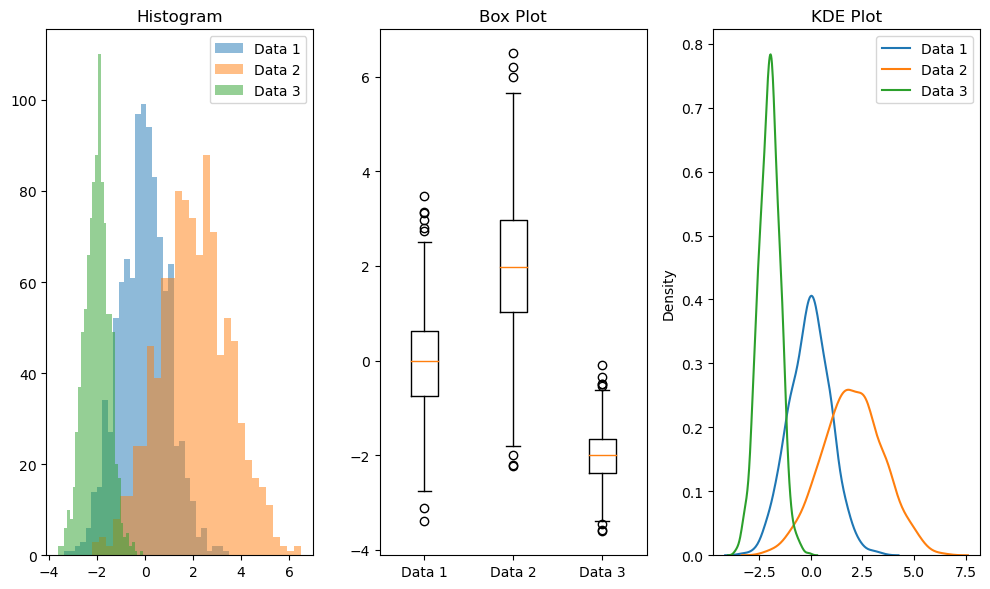

Data 1:
Mean: -0.04710661660528994
Median: -0.015051471857791408
Mode: -0.921420545987477
Range: 6.865425571075074
Variance: 1.0162293961684576
Standard Deviation: 1.0080820384117841

Data 2:
Mean: 2.020498233682115
Median: 1.983872811524987
Mode: 1.0618264055396869
Range: 8.72726142399581
Variance: 2.1450493807280466
Standard Deviation: 1.464598709793248

Data 3:
Mean: -2.0140584901470633
Median: -1.99363754665551
Mode: -2.4862049297800235
Range: 3.5246635206896757
Variance: 0.2692376842022345
Standard Deviation: 0.5188811850532206


In [1]:
"""描述数据分布示例代码"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# Generate multiple random datasets
data1 = np.random.normal(loc=0, scale=1, size=1000)
data2 = np.random.normal(loc=2, scale=1.5, size=1000)
data3 = np.random.normal(loc=-2, scale=0.5, size=1000)

# Calculate measures of central tendency
mean1 = np.mean(data1)
mean2 = np.mean(data2)
mean3 = np.mean(data3)

median1 = np.median(data1)
median2 = np.median(data2)
median3 = np.median(data3)

mode1 = statistics.mode(data1)
mode2 = statistics.mode(data2)
mode3 = statistics.mode(data3)

# Calculate measures of dispersion
range1 = np.ptp(data1)
range2 = np.ptp(data2)
range3 = np.ptp(data3)

variance1 = np.var(data1)
variance2 = np.var(data2)
variance3 = np.var(data3)

std_deviation1 = np.std(data1)
std_deviation2 = np.std(data2)
std_deviation3 = np.std(data3)

# Create visualizations
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.hist(data1, bins=30, alpha=0.5, label='Data 1')
plt.hist(data2, bins=30, alpha=0.5, label='Data 2')
plt.hist(data3, bins=30, alpha=0.5, label='Data 3')
plt.legend()
plt.title('Histogram')

plt.subplot(1, 3, 2)
plt.boxplot([data1, data2, data3])
plt.xticks([1, 2, 3], ['Data 1', 'Data 2', 'Data 3'])
plt.title('Box Plot')

plt.subplot(1, 3, 3)
sns.kdeplot(data1, label='Data 1')
sns.kdeplot(data2, label='Data 2')
sns.kdeplot(data3, label='Data 3')
plt.legend()
plt.title('KDE Plot')

plt.tight_layout()
plt.show()

# Print the calculated measures
print("Data 1:")
print(f"Mean: {mean1}")
print(f"Median: {median1}")
print(f"Mode: {mode1}")
print(f"Range: {range1}")
print(f"Variance: {variance1}")
print(f"Standard Deviation: {std_deviation1}")

print("\nData 2:")
print(f"Mean: {mean2}")
print(f"Median: {median2}")
print(f"Mode: {mode2}")
print(f"Range: {range2}")
print(f"Variance: {variance2}")
print(f"Standard Deviation: {std_deviation2}")

print("\nData 3:")
print(f"Mean: {mean3}")
print(f"Median: {median3}")
print(f"Mode: {mode3}")
print(f"Range: {range3}")
print(f"Variance: {variance3}")
print(f"Standard Deviation: {std_deviation3}")